## **Machine Learning Final Project**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

Will be updated the coming week.

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Thursday (05/06/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
# Start solution here

# Final Project on Marketing Budgets

Marketing is making use of data analytics more frequently. I am taking a marketing class this semester, and I realized that marketing analytics is a growing area that still has a lot of potential. In this project, I will take a look at the Dummy Marketing and Sales Data from Kaggle (https://www.kaggle.com/harrimansaragih/dummy-advertising-and-sales-data).

I will perform analysis on the correlations between marketing budgets and the sales revenue, and build up a model for predicting the sales revenue using those factors.

There are 4572 rows of data and 5 columns. Here are some details about the columns:

*   **TV**: TV promotion budget (in million)
*   **Radio**: Radio promotion budget (in million)
*   **Social Media**: Social Media promotion budget (in million)
*   **Influencer**: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
*   **Sales**: Sales revenue(in million)





In [25]:
# Import packages that will used in this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neural_network import MLPRegressor

In [4]:
# Read the Data

url = "https://drive.google.com/file/d/1Pn8x4Y8BzqcTocRHs4Sn5lsNWEdAztcc/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
# Clean the data

df['missing'] = df.isnull().any(axis=1)
df[df['missing'] == True]

,TV,Radio,Social Media,Influencer,Sales,missing
13,NaN,22.351667,3.031815,Mega,276.165351,True
26,NaN,34.111674,4.624148,Nano,342.913372,True
46,NaN,34.859637,7.781417,Mega,318.969784,True
75,NaN,6.482293,0.866845,Macro,91.177216,True
99,NaN,7.635819,1.554146,Macro,56.186730,True
119,NaN,30.470485,6.806919,Micro,336.818690,True
141,NaN,9.164464,1.096681,Macro,65.259189,True
163,NaN,38.118424,6.676611,Micro,328.555184,True
182,81.0,26.425422,NaN,Macro,288.649441,True
183,NaN,1.287060,0.396179,Macro,56.545293,True


In [6]:
# Since there is not a lot of rows missing data, we can just drop those rows
df.dropna(inplace=True)
df.drop(columns='missing',inplace = True)

In [7]:
# Now we can create dummies for "Influencer" column based on the influence level
# That is, 4 for Mega, 3 for Macro, 2 for Nano, 1 for Micro

df['Influencer'].replace({'Mega': 4, 'Macro': 3, 'Nano': 2, 'Micro': 1}, inplace = True)
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,1,56.594181


                    TV     Radio  Social Media  Influencer     Sales
TV            1.000000  0.869158      0.527687    0.000528  0.999497
Radio         0.869158  1.000000      0.606338   -0.001103  0.868638
Social Media  0.527687  0.606338      1.000000    0.020432  0.527446
Influencer    0.000528 -0.001103      0.020432    1.000000  0.000866
Sales         0.999497  0.868638      0.527446    0.000866  1.000000


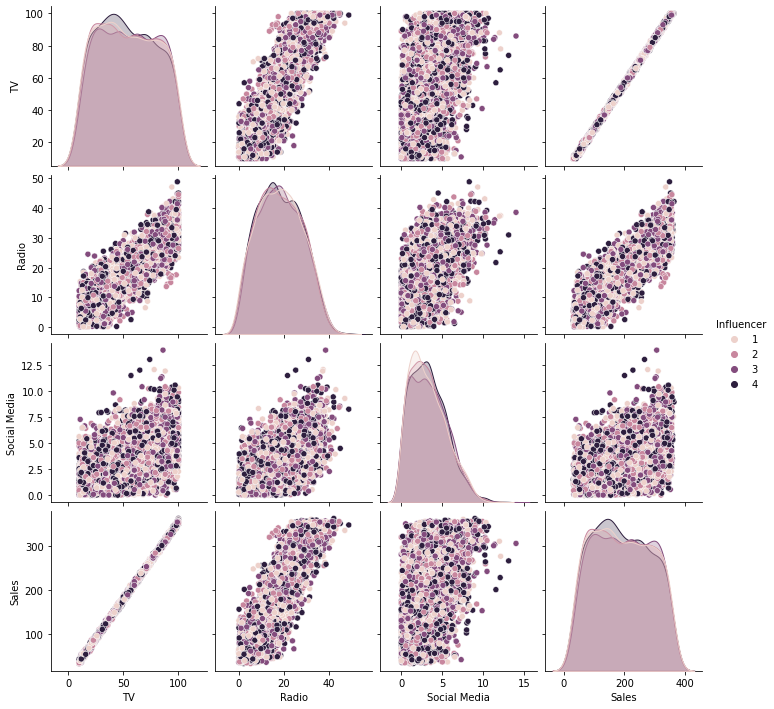

In [8]:
# Visualize the data to figure out if all the factors have correlations

print(df.corr())
sns.pairplot(df, hue = 'Influencer')

Here, I use different colors to distinguish the different levels of influencers and try to see the correaltion between potential factors and the sales revenue.

Below are some interesting findings:

1.   The more someone invests in the radio promotion budget, the smaller size the influencer will be
2.   TV promotion has a really positive linear relation to the sales revenue, and it is possible that TV promotion is the most influencing factor


In [13]:
# Some useful models may be: multi-variable regression, decision tree, and neural network

X = df[['TV', 'Radio', 'Social Media', 'Influencer']]
y = df['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Regression

model1 = LinearRegression()
model1.fit(X_train,y_train)

print("Intercept:",model1.intercept_)
print("Accuracy on Training partition:",model1.score(X_train,y_train))
print("Accuracy on Testing partition:",model1.score(X_test,y_test))

Intercept: -0.311165470879871
Accuracy on Training partition: 0.9989853056620842
Accuracy on Testing partition: 0.9990149928039866


In [33]:
# Decision Tree

model2 = DecisionTreeRegressor(max_depth=7, criterion="mse", random_state=2020)
model2.fit(X_train,y_train)
y_pred = model2.predict((X_test))


acc_training = model2.score(X_train, y_train)
print("Accuracy on Training partition:",acc_training)

acc_testing = model2.score(X_test, y_test)
print("Accuracy on Testing partition:",acc_testing)

Accuracy on Training partition: 0.9990786848323886
Accuracy on Testing partition: 0.9988599946895342


In [45]:
# Neural Network

model3 = MLPRegressor(hidden_layer_sizes=(2, 2), max_iter=1000)

model3.fit(X_train, y_train)

print("Accuracy on Training partition:", model3.score(X_train, y_train))
print("Accuracy on Testing partition:", model3.score(X_test, y_test))

Accuracy on Training partition: 0.9989760925784549
Accuracy on Testing partition: 0.9990141678705267


Based on the accuracy, we can see that overfitting exists in the decision tree model. However, when we look at the regression model, the intercept is negative, which means companies will make negative sales if they do nothing in their advertising. It is not necessarily true in reality. So, we will choose the neural network for cross validation.


In [51]:
# Cross Validation

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
print(alpha_space)
model_scores = []

lasso_model = Lasso(normalize=True) #same for Ridge
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(np.max(model_scores))
print(alpha_space[best_alpha_index])

[1.00000000e-04 1.20679264e-04 1.45634848e-04 1.75751062e-04
 2.12095089e-04 2.55954792e-04 3.08884360e-04 3.72759372e-04
 4.49843267e-04 5.42867544e-04 6.55128557e-04 7.90604321e-04
 9.54095476e-04 1.15139540e-03 1.38949549e-03 1.67683294e-03
 2.02358965e-03 2.44205309e-03 2.94705170e-03 3.55648031e-03
 4.29193426e-03 5.17947468e-03 6.25055193e-03 7.54312006e-03
 9.10298178e-03 1.09854114e-02 1.32571137e-02 1.59985872e-02
 1.93069773e-02 2.32995181e-02 2.81176870e-02 3.39322177e-02
 4.09491506e-02 4.94171336e-02 5.96362332e-02 7.19685673e-02
 8.68511374e-02 1.04811313e-01 1.26485522e-01 1.52641797e-01
 1.84206997e-01 2.22299648e-01 2.68269580e-01 3.23745754e-01
 3.90693994e-01 4.71486636e-01 5.68986603e-01 6.86648845e-01
 8.28642773e-01 1.00000000e+00]
0.9989783549216019
0.0009540954763499944


In [52]:
alpha_user = 0.0009540954763499944 
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print(lasso_coef)

[ 3.56050756  0.         -0.          0.        ]


The lasso model shows that only TV makes a difference in the sales revenue. Let us take a closer look.

# Models' Performance

Overall, both the linear regression and neural network models work pretty well for the dataset. However, after the cross validation, we can see that only TV makes a difference in the sales revenue, which is surprising to me. It means that even without considering other factors/parameters, we will still have a really good performance with the regression or neural network model. I think one reason for this result could be the data is not diverse enough to include more factors so that we can better evaluate the determinants of the sales revenue.

This is the correlation matrix of ['Radio', 'Social Media','Sales'] for micro-level influencers


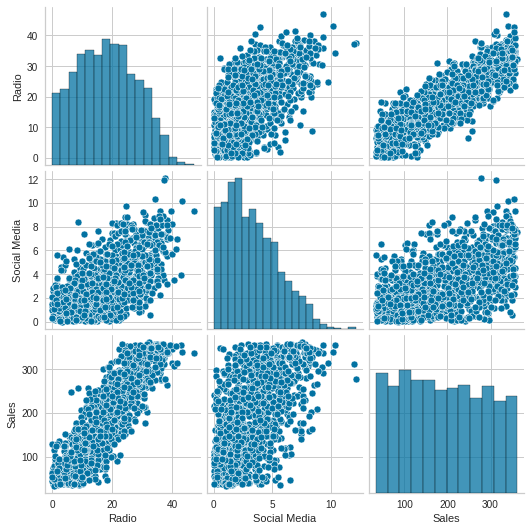

This is the correlation matrix of ['Radio', 'Social Media','Sales'] for nano-level influencers


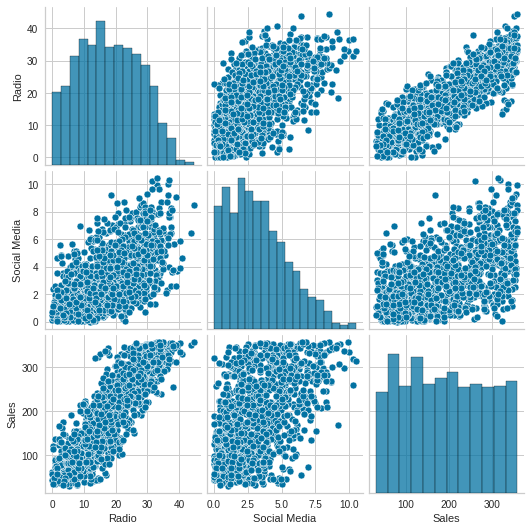

This is the correlation matrix of ['Radio', 'Social Media','Sales'] for macro-level influencers


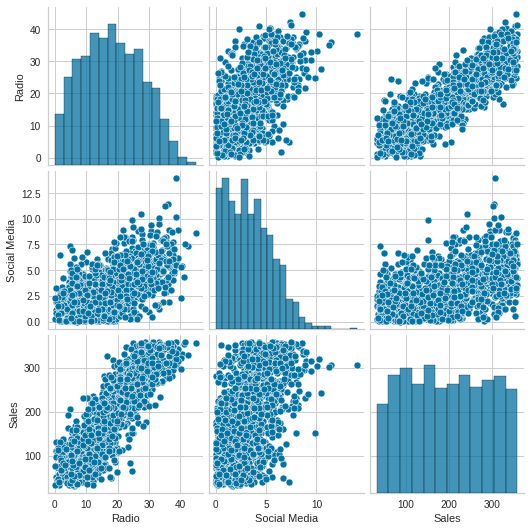

This is the correlation matrix of ['Radio', 'Social Media','Sales'] for mega-level influencers


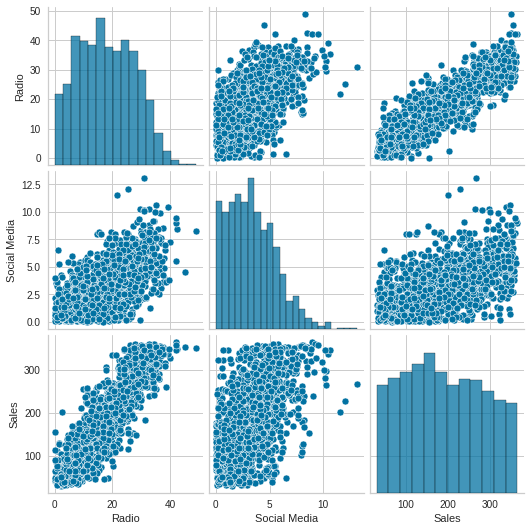

In [56]:
# Interesting Findings
minor_factors = ['Radio', 'Social Media','Sales']
influence_level = ["micro","nano","macro","mega"]
for i in range(1,5):
  temp = df[df['Influencer'] == i]
  print("This is the correlation matrix of ['Radio', 'Social Media','Sales'] for " + influence_level[i-1] + "-level influencers")
  sns.pairplot(temp[minor_factors])
  plt.show()


Here, we can still see the positive relationships between the radio budget and sales revenue as well as the positive correlation between the social media budget and sales revenue. I think it is not that strong, but still shows something for us. Therefore, the cross validation may be too strong and overlook the weak factors.